In [2]:
#Read Data from ASCII file

data_array = []
with open('C:/Users/NDC-RANJAN/Downloads/punet2.dat') as ip_file:
    for line in ip_file:

        tmax = int(line[11:14])/10 if ' ' not in line[11:14] else None
        
        tmin = int(line[14:17])/10 if ' ' not in line[14:17] else None
        
        rf = int(line[19:23])/10 if ' ' not in line[19:23] else None
        
        data_array.append((line[:5],line[77:79]+line[5:7],line[7:9],line[9:11],tmax,tmin,rf))

In [3]:
#Creation of pandas dataframe

import pandas as pd
df = pd.DataFrame(data_array,columns=['station','year','month','date','tmax','tmin','rf'])  

#Export to CSV File
df.to_csv('pune_wx.csv',index=False,header=['Station Index','Year','Month','Date','Maximum Temperature','Minimum Temperature','Rainfall'])

In [172]:
#Prepare climatological information

df[['tmax','tmin']].mean()
#Mean Temperature
mean_temp = df.groupby(['month'])[['tmax','tmin']].mean().round(1)

#Monthly Mean Rainfall
mean_monthly_rf = df.groupby(['year', 'month'])['rf'].sum().reset_index()
mean_rf = mean_monthly_rf.groupby(['month'])['rf'].mean().round(1).reset_index()

normals = pd.merge(mean_temp, mean_rf, on='month')
normals.columns = ['month', 'tmax', 'tmin', 'rf']

normals
#pd.set_option('display.max_rows',None)                     #Display all rows

In [171]:
#Extremes for each month
extremes= df.groupby('month').agg({'tmax':'max','tmin':'min','rf':'max',})
extremes

nor_extr = pd.merge(normals,extremes,on='month')
nor_extr.columns = ['Month','Mean_Tmax','Mean_Tmin','Mean_Monthly_RF','Extreme_Tmax','Extreme_Tmin','Extreme_RF']
nor_extr


In [64]:
#Filtering of data

#Values greater than  some threshold data

df[(df['month'] == '05') & (df['tmax'] > 40)]

In [170]:
#Filtering to find extreme events

extr_tmax = df[df['month'] == '05'].sort_values(by=['tmax'], ascending = False).head(10)

df[df['month'] == '06'].nlargest(10, 'rf')[['year','month','date','rf']]
extr_tmax.loc['tmax']

In [169]:
#Count number of occurrences of each value

tmax_count=df['tmax'].value_counts().reset_index()
tmax_count.columns = ['Tmax','Count']
tmax_count
tmax_count.sort_values(by=['Tmax'])

In [165]:
#Plot values

import matplotlib.pyplot as plt
plt.bar(normals['month'],normals['tmax'])
plt.plot(normals['month'],normals['tmin'])
plt.bar(tmax_count['Tmax'],tmax_count['Count'])

In [ ]:
import matplotlib.pyplot as plt
mean_maxt = df.groupby(['month']).agg({'tmax':'mean'}).round(1).reset_index()
plt.bar(mean_maxt['month'],mean_maxt['tmax'])
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.title('Monthly Tmax')
plt.ylim(20,40)
for index, value in enumerate(mean_maxt['tmax']):
    plt.text(index, value, str(value), ha='center', va='bottom')


In [166]:
ann_temp = df.groupby('year')[['tmax']].mean().reset_index().round(1)
ann_temp

In [167]:
plt.bar(ann_temp['year'],ann_temp['tmax'])
plt.xlabel('Year \u2192')
plt.ylabel('Maximum Temperature \u2192')
plt.title('Annual Maximum Temperature')
plt.ylim(30)



In [168]:
import pymannkendall as mk
slope_result = mk.original_test(ann_temp['tmax'])
slope_result

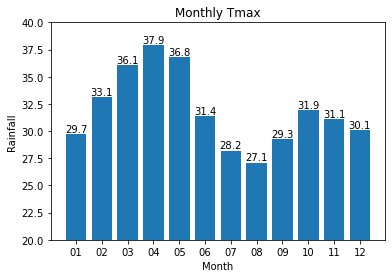